# Running algorithms on graphs using networkx

<b>Goals of this notebook:</b>
Learn how to invoke algorithms on graphs from `networkx`.

<b>Python packages required:</b>
`networkx`

<b>Prerequisites:</b>
Know how to create graphs and digraphs (see tutorial notebook on `networkx`).

<b>Additional resources:</b>
Algorithms implemented in `networkx` are classified and listed in [the official documentation](https://networkx.org/documentation/stable/reference/algorithms/index.html).

In addition to storing graphs and digraphs, `networkx` allows us to run a wide variety of standard algorithms on graphs.

In this notebook, we show how to invoke a number of algorithms on many types of graphs: undirected and directed, with and without node and edge attributes.

## Part 1. Algorithms on undirected graphs

We'll use the following graph as an example for testing the algorithms.

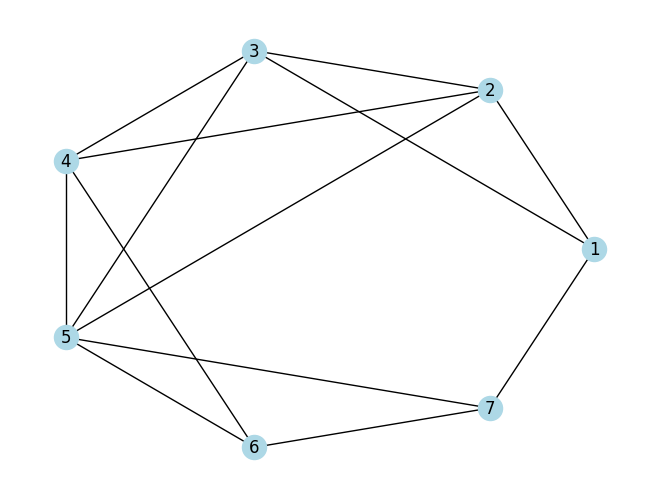

In [1]:
# Import networkx and run the magic command for later inline drawings
# It's sufficient to execute these commands once for the whole notebook
from itertools import combinations
import networkx as nx
%matplotlib inline

# Create an empty graph
G = nx.Graph()

# Add vertices
G.add_nodes_from(range(1,8))

# Add edges
for pair in combinations(G.nodes, 2):
    if abs(pair[0] - pair[1]) % 5 == 1 or abs(pair[0] - pair[1]) % 5 == 2:
        G.add_edge(pair[0], pair[1])
G.add_edge(2,5)
        
# Fix a position of the nodes
node_pos =  nx.circular_layout(G)

# Draw G with fixed positions
nx.draw(G,with_labels = True, pos = node_pos, node_color = 'lightblue')

### Triangles

A triangle in a graph is three nodes that are all connected by an edge.
One way to check if `G` has a triangle is to check every triple of nodes and see if they are adjacent.
The expression

`(i, j) in G.edges` 

evaluates to `True` if `(i, j)` is an edge of `G`.

Run the following line of code to check if `G` contains a triangle. We also print any triangles found.

In [2]:
# Import the itertools to quickly loop through triples
from itertools import combinations

# Loop through triples
for tri in combinations(G.nodes, 3):
    # Check if there is a triangle. 
    if (tri[0], tri[1]) in G.edges and (tri[0], tri[2]) in G.edges and (tri[1], tri[2]) in G.edges:
        print(f'G contains the triangle {tri}.')

G contains the triangle (1, 2, 3).
G contains the triangle (2, 3, 4).
G contains the triangle (2, 3, 5).
G contains the triangle (2, 4, 5).
G contains the triangle (3, 4, 5).
G contains the triangle (4, 5, 6).
G contains the triangle (5, 6, 7).


<i>Note:</i> Another way of checking if an edge exists is to check if one node contains another node in its <i>adjacency list</i>.
The adjacencies of `G` can be accessed using `G.adj`.
The specific neighbors of a node can be accessed using the command `G.adj[v]`, where `v` is the node whose neighbors we want.

Another way to check if a triangle exists in `G` using predefined functions in `networkx`.

The package `networkx` has a command to find all cliques in an undirected graph. 
A clique in a graph is a set of nodes that are all connected (so a triangle is a clique of size 3).
The command for this function is 

`nx.enumerate_all_cliques(G)`.

Thus, to determine if a graph `G` contains a triangle, we can consider every clique in `G` (by iterating over the output of `nx.enumerate_all_cliques(G)`) and check if its size is equal to 3.

<i>Note:</i> Be aware that the number of all cliques can be exponential in the number of nodes in the graph (for example, when the graph is the complete graph). The function `enumerate_all_cliques()` only keeps current candidate node lists in memory during its search and thus avoids storing all the cliques in memory, while `list(nx.enumerate_all_cliques(G))` explicitly generates and saves all of them in memory.

Run the following line of code to find all of the cliques in `G` and print all the triangles.

In [3]:
# Use the predefined command nx.enumerate_all_cliques()
for clique in nx.enumerate_all_cliques(G):
    if len(clique) == 3:
        print(f'G contains the triangle {clique}.')

G contains the triangle [1, 2, 3].
G contains the triangle [2, 3, 4].
G contains the triangle [2, 3, 5].
G contains the triangle [2, 4, 5].
G contains the triangle [3, 4, 5].
G contains the triangle [4, 5, 6].
G contains the triangle [5, 6, 7].


### Induced subgraphs

An induced subgraph of `G` contains the relationships for a certain subset of the nodes. 
Recall that the edges of an <i>induced</i> subgraph are those edges with both endpoints in the induced node set.
Suppose that we want to draw the subgraph of `G` induced by the nodes of `G` of degree 3. 

Given a set `L` of nodes of `G`, we can use the command 

`H = G.subgraph(L)` 

to create the subgraph induced by `L`.

We can access the degree of a node labeled `v` using the command `G.degree[v]`.

Run the following command to create `H` and draw it using the same node positions as before.

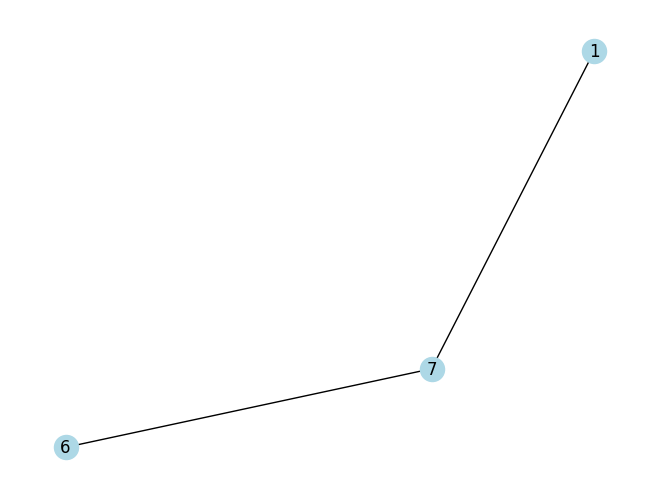

In [4]:
# Find the nodes of G of degree 3
deg_3_nodes = [i for i in G.nodes if G.degree[i]==3]

# Create H using these nodes
H = G.subgraph(deg_3_nodes)

# Draw H
nx.draw(H, with_labels=True, pos=node_pos, node_color='lightblue')

### Maximum matchings

A <i>matching</i> is a set of edges of `G` such that no two edges share a node.
Out of all matchings in `G`, a <i>maximum matching</i> is a matching with the largest number of edges.
We can find a maximum matching in a graph using the command 

`M = nx.max_weight_matching(G)`

This command returns a set of edges `M` in the matching.

Run the following code to find a maximum matching in `G` and print the edges.

In [5]:
# Find a maximum matching in G
M = nx.max_weight_matching(G)

print(f'A maximum matching in G is {M}.')

A maximum matching in G is {(5, 3), (7, 1), (6, 4)}.


We can draw `G` with only the edges of `M`.
We do this by adding the optional input 

`edgelist = M` 

into the `nx.draw()` command.

Run the following command to draw `G` with the edges of `M`. We use the same node positions as before.

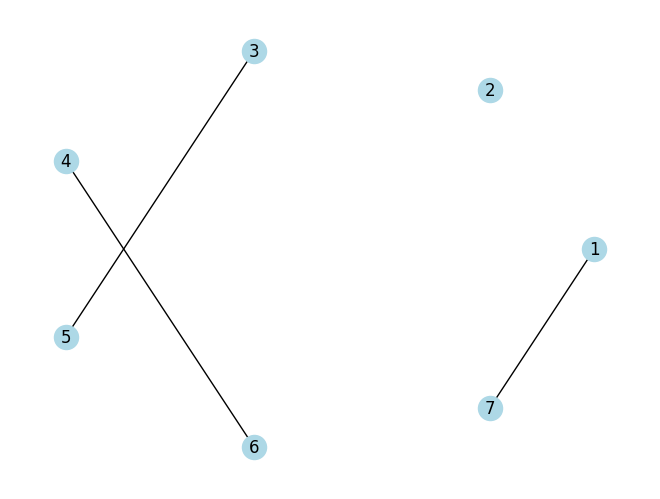

In [6]:
# Draw G with the edges of M
nx.draw(G, pos=node_pos , edgelist=M, 
        with_labels=True, node_color='lightblue')

### Breadth-first search

Suppose that we want to run the BFS algorithm on `G` using `1` as a root. 
One method to run BFS is using the command 

`edges_from_BFS = list(nx.bfs_edges(G, 1))`

The previous command runs `nx.bfs_edges(G,1)` and returns the edges found by the BFS algorithm in the order that the BFS algorithm found them.

<i>Note:</i> The command `nx.bfs_edges(G, 1)` returns a data structure called a generator, which provides an efficient way to iterate through the edges without the need to actually generate and save them in some data structure first. You do not need to know precisely how a generator works; for our purposes here, we use `list(nx.bfs_edges(G, 1))` in order to transform the generator to a list.

Run the following code to run BFS on `G` starting at `1`. We print the edges and nodes in the order they are visited.

In [7]:
# Run BFS on G with root node 1
edges_from_BFS = list(nx.bfs_edges(G, 1))

# Print the edges from the BFS algorithm
print(f'Here are the edges that BFS finds if we start at 1: {edges_from_BFS}.')

# Print the nodes from the BFS algorithm
nodes_from_BFS = [1] + [v for u, v in edges_from_BFS]
print(f'Here are the nodes that BFS finds if we start at 1: {nodes_from_BFS}.')

Here are the edges that BFS finds if we start at 1: [(1, 2), (1, 3), (1, 7), (2, 4), (2, 5), (7, 6)].
Here are the nodes that BFS finds if we start at 1: [1, 2, 3, 7, 4, 5, 6].


Finally, we can draw `G` with only the edges visited by `BFS`. 

Run the following command to draw `G` with the edge list `edges_from_BFS`. 

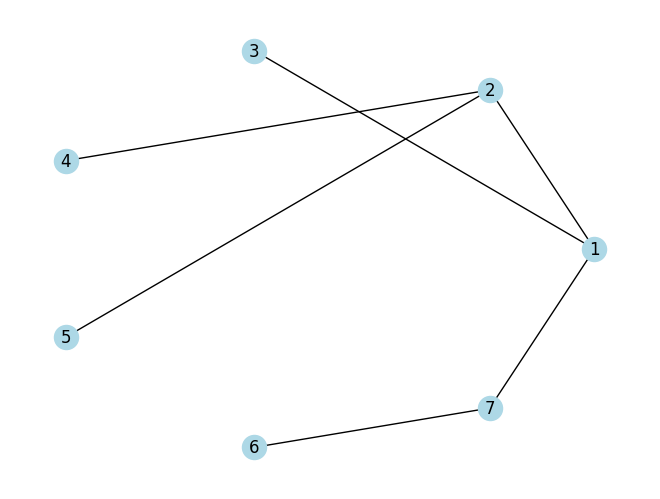

In [8]:
# Draw G with the edges of M
nx.draw(G, pos=node_pos , edgelist=edges_from_BFS, 
        with_labels=True, node_color='lightblue')

## Part 2. Algorithms on directed graphs

### Shortest paths

For this example, we will use the following digraph:

$$
\begin{array}{rcl}
\text{Nodes} &=& \{1, \dotsc, 20\}\\
\text{Arcs} &=& \left\{(u,v)~ | ~ u < v \text{ and at least one of the following holds:}~~
\begin{array}{l}
v-u\equiv 0 \pmod{7} ~~\text{or }\\
v-u\equiv 3 \pmod{5}
\end{array}\right\}.
\end{array}
$$

Run the following code to build and draw `H`.

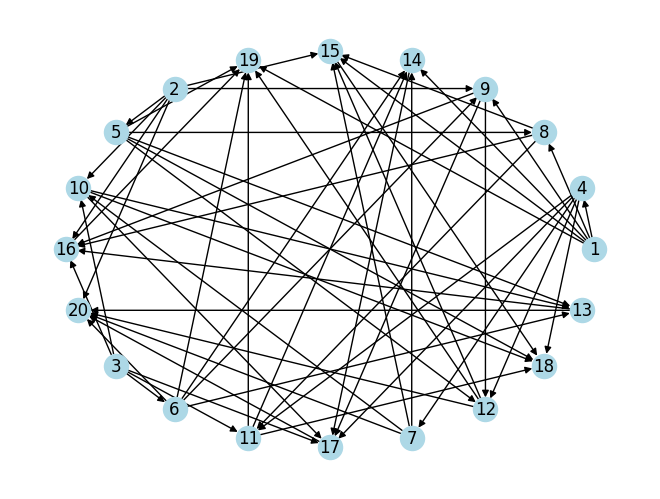

In [9]:
# Create an empty digraph
H = nx.DiGraph()

# Add the nodes and arcs
for u in range(1, 21):
    for v in range(u+1, 21):
        if abs(v-u) % 7 == 0 or abs(v-u) % 5 == 3:
            H.add_edge(u,v)

# Draw H
node_pos_H = nx.circular_layout(H)

nx.draw(H, with_labels=True, pos=node_pos_H, 
        node_color='lightblue', arrowsize=10)

In this example we want to check if there is a path from `1` to `20` in `H`.
Recall that a path in a digraph can only visit a node or arc at most once, and a path must travel along an arc in the direction that it points.

One way to check if a path exists is to use the BFS algorithm starting at `1`. 

Run the following commands to run BFS starting at `1`.

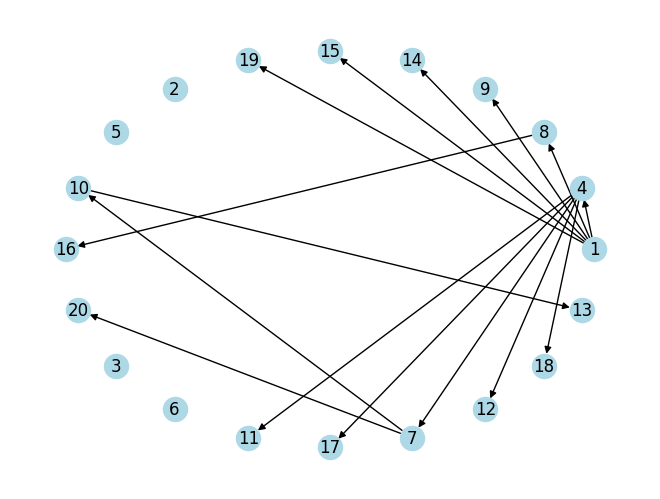

In [10]:
# Run BFS starting at 1
arcs_from_BFS = list(nx.bfs_edges(H,1))

# Draw H with BFS arcs
nx.draw(H, with_labels=True, pos=node_pos_H, 
        edgelist=arcs_from_BFS, node_color='lightblue', arrowsize=10)

Note that there is an arc pointing to `20` in this sub-digraph.
This means that there is a path from `1` to `20`. 
From the picture we can see that `1,4,7,20` is the a path from `1` to `20`.

Another way of finding a path from `1` to `20` is to use the shortest path command in `networkx`.
This command is 

`nodes_short_path = nx.shortest_path(H, source=1, target=20)` 

This command returns a list of the nodes taken on the shortest path and stores it in `nodes_short_path`.

Run the following command to run the shortest path algorithm.

In [11]:
# Run a shortest path algorithm from 1 to 20.
nodes_short_path = nx.shortest_path(H, source = 1, target = 20)

# Print the nodes on the shortest path
print(f'A shortest path from 1 to 20 is {nodes_short_path}.')

A shortest path from 1 to 20 is [1, 4, 7, 20].


### Longest paths

Consider the digraph `H` from the previous example.
Instead of finding a short path in `H`, what if we want to find the longest path between any two nodes in `H`?
Note that there are no cycles in `H` because every arc `(u,v)` satisfies `u < v`.

From the previous example, we know that there is a path of length four between `1` and `20`.
However, it is not obvious from the previous drawing that there is a longer path in `H`.
Let us redraw `H` to see if we can visualize a longer path.
Intuitively, the longest path will start at a node with no incoming arcs and end at a node with no outgoing arcs. 

Run the following line of code to find these two sets of nodes.

In [12]:
# Find the nodes without incoming arcs
for u in H.nodes:
    if H.in_degree(u) == 0:
        print(f'{u} has no incoming arcs.')

                
# Find the nodes without outgoing arcs
for u in H.nodes:        
    if H.out_degree(u) == 0:
        print(f'{u} has no outgoing arcs.')

1 has no incoming arcs.
2 has no incoming arcs.
3 has no incoming arcs.
19 has no outgoing arcs.
20 has no outgoing arcs.
18 has no outgoing arcs.


So there are three nodes without incoming arcs and three nodes without outgoing arcs.
Let us redraw `H` so that the nodes form columns of three nodes each. 
This will require us to create new node positions to replace ` node_pos_H`. 
We will create these new positions manually by providing specific coordinates for where we want the nodes to be drawn. 
We will call these new positions `new_node_pos_H`.
If we want to set the coordinates of node `u` to be `(x,y)`, then we use the command

`new_pos_H[u] = (x,y)`

<i>Note:</i> The positions in `networkx` are relative, so changing the coordinates might not necessarily yield the result that you want. However, it is not important to know how to draw graphs perfectly with `networkx`. It is usually enough to just use the preset layouts such as `circular_layout` in `networkx`.

Run the following lines of code to create new node positions and redraw `H`.

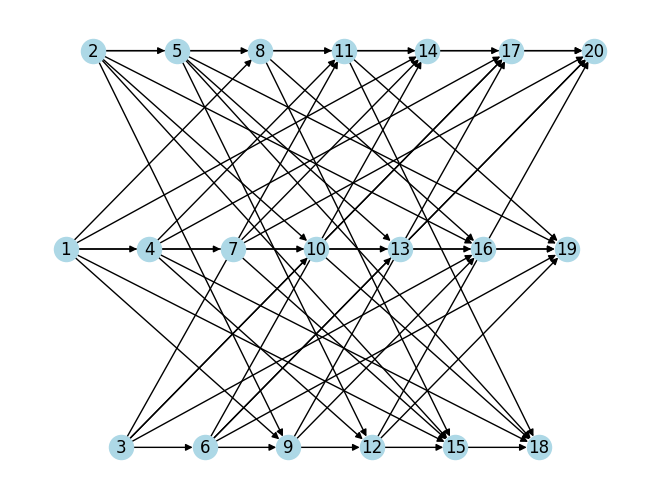

In [13]:
# Create new node positions
new_pos_H = {}

for u in H.nodes:
    new_pos_H[u] = ( u/3 , u % 3)

# Redraw H
nx.draw(H, with_labels = True, pos = new_pos_H, 
        node_color = 'lightblue', arrowsize=10)

These new node positions show us that there are paths with more than four nodes. 
The paths `1,4,7,10,13,16,19` and `2,5,8,11,14,17,20` each have seven nodes!

We can find the longest path using the `networkx` commmand `nx.dag_longest_path(H)`. Here, `dag` refers to a directed acyclic graph.

Run the following line of code to find a longest path in `H`.

In [14]:
# Find a longest path in H

long_path = nx.dag_longest_path(H)

print(f'A longest path in H is {long_path}.')

A longest path in H is [1, 4, 7, 10, 13, 16, 19].


## Part 3. Algorithms involving node and edge attributes

### Triangles with specific nodes

Consider the following problem. Suppose that we have a group of students where each studies one of three subjects: medicine, law, or art. Some students in the group may know each other, while others might not. We assume that acquaintances are mutual, i.e., if Alice knows Bob, then Bob knows Alice too. We want to select a group of three students who know each other for a project that requires knowledge from all three disciplines.

In formal terms, we have an undirected graph where vertices represent students and edges represent acquaintances. Every node has an attribute --- the student's subject. Our goal is to find a triangle made of a medical student, a law student, and an art student.

For this example, we will use the premade icosahedral graph in `networkx`. 

<i>Note:</i> `networkx` has a collection of pre-made graphs that we can load. For more pre-made graphs, see https://networkx.github.io/documentation/networkx-1.10/reference/generators.html?highlight=social.

The students in this graph will be denoted by indeces from `0` to `11`, and the node attribute will be called `study`.

Run the following code to generate the graph for this example. We have arbitrarily chosen each student's area of study.

Students [0, 2, 7, 6] study medicine.
Students [3, 9] study law.
Students [1, 4, 5, 8, 10, 11] study art.


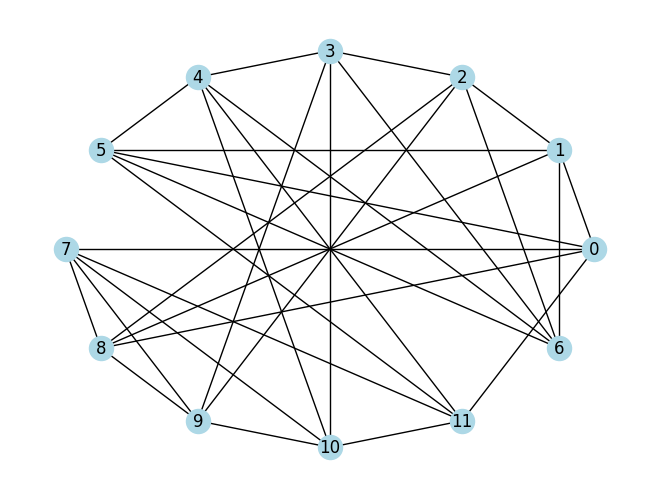

In [15]:
# Load a pre-made graph from networkx
K = nx.icosahedral_graph()

# Create node attribute 'study'
for i in range(0, 12):
    if i % 6 == 0 or i % 5 == 2:
        K.nodes[i]["study"] = "medicine"
    elif i % 6 == 3:
        K.nodes[i]["study"] = "law"
    else:
        K.nodes[i]["study"] = "art"

# Print the student's area of study
study_att = nx.get_node_attributes(K,"study")

for area_of_study in ["medicine","law","art"]:
    print(f'Students {[student for student in K.nodes if study_att[student] == area_of_study]} study {area_of_study}.')

# Draw the graph
node_pos_K = nx.circular_layout(K)

nx.draw(K, with_labels=True, pos=node_pos_K, 
        node_color='lightblue')

We can loop through all triples of points and check if they are a proper triangle.

Run the following code to see if the professor can find a suitable triangle of students. 

In [16]:
# Import the itertools to quickly loop through triples
from itertools import combinations

# Loop through triples
for t in combinations(K.nodes,3):
    
    # Check if the edges form a proper triangle
    if set(combinations(t,2)).issubset(K.edges) and\
           {K.nodes[n]["study"] for n in t} == {"medicine","law","art"}:
        
        print(f'The professor can choose students {t}.')

The professor can choose students (2, 8, 9).
The professor can choose students (3, 4, 6).
The professor can choose students (7, 8, 9).
The professor can choose students (7, 9, 10).


### Maximum $s$-$t$ flows

Let's solve a maximum $s$-$t$ flow problem.
In a maximum flow problem, we are given a digraph where each arc has an attribute called `capacity`.
We will use the following digraph `H` in this example. It is not important for the example how we make this digraph.
Simply run the following commands to create `H` with integral arc attributes called `capacity`. 

In [17]:
# Created an empty graph
H = nx.DiGraph()

# Add the arcs
for i in range(1, 12):
    H.add_edge(i, i+1, capacity=2*i)  
    
    if i <= 8:
        H.add_edge(i, i+4, capacity=i*i-10*i+25) 

# Add node positions
node_pos = nx.circular_layout(H)

It would be nice to draw `H` with the capacities on each arc. 
In order to do this, we first draw our graph with the usual command

`nx.draw(H, with_labels = True, pos = node_pos, 
            node_color = 'lightblue', arrowsize = 20)`

We now draw our arc attributes on top of this graph using the command

`nx.draw_networkx_edge_labels(H, pos = node_pos, 
                              edge_labels = nx.get_edge_attributes(H, 'capacity'));`

This command has four parts:

`H` : This is the name of the graph.

`pos = node_pos` : This says where we draw the arc attribute. If we use the same position as for the nodes, then `networkx` will draw the attriute in the middle of the arc.

`edge_labels = nx.get_edge_attributes(H, 'capacity')` : We choose to draw the `capacity` arc attribute.

`;` : Since the function `nx.draw_networkx_edge_labels` returns the attribute value drawn on the arcs, and since Jupyter prints out the last statement if it is an expression by default, we add a semicolon at the end of the line to suppresses the output of the function.

Run the following commands to visualize `H` with capacities.

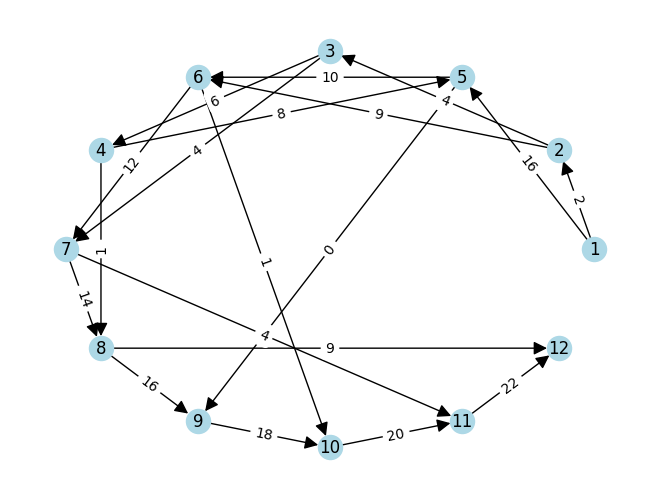

In [18]:
# Draw H
nx.draw(H, with_labels = True, pos = node_pos, 
        node_color = 'lightblue', arrowsize = 20)

# Draw the arc labels
nx.draw_networkx_edge_labels(H, pos = node_pos, 
                             edge_labels = nx.get_edge_attributes(H, 'capacity'));

# Note: There might be a deprecation warning appearing; it comes from code in the networkx package, so we cannot do much about it.

Now that we have our digraph with arc capacities, we can run a maximum $s$-$t$ flow algorithm.
Suppose we want to run a maximum s-t flow in `H` with $s=1$ and $t = 12$ using the arc attributes named 'capacity' as capacities for the network flow problem.
The command to run this algorithm is

`total_flow, edge_flow = nx.maximum_flow(H, 1, 12, capacity='capacity')`. 

<i>Note:</i> It might seem redundant to use the input `capacity='capacity'`. It turns out that if arcs have an attribute named `capacity`, then the `nx.maximum_flow` function will use these per default and we do not need to add the input `capacity='capacity'`. However, if for some reason we choose to label the capacity attribute with another name like `Cap`, then we would need to specify `capacity='Cap'`.

This command returns two things: 

`total_flow` : the total value of the flow.

`edge_flow` : a dictionary containing the value of the flow on each arc. In order to access the flow on an arc `e`, we use the command `edge_flow[e[0]][e[1]]`.

Run the following command to find a maximum $s$-$t$ flow in `H` with $s=1$ and $t = 12$.  

In [19]:
# Find a max s-t flow in H
total_flow, edge_flow = nx.maximum_flow(H, 1, 12, capacity='capacity')

Now we have the information about our flow! Let's print it out.

We can do this by adding a new arc attribute called `flow` using the values from `edge_flow`.
The `flow` attribute has not yet been created, but we can simply add this attribute to each arc `e` using the command 

`H.edges[e]['flow'] = edge_flow[e[0]][e[1]]` 

as if the attribute was there! 
Python will read this command and automatically create a new arc attribute called `flow`.

Run the following commands to print the flow results.

The total value of the flow is 12.



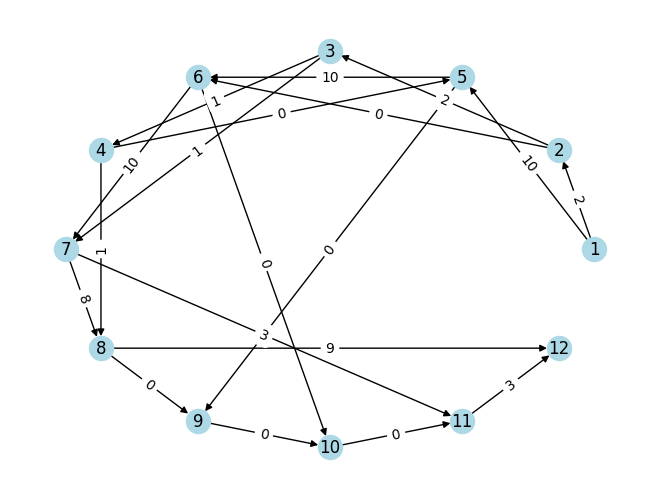

In [20]:
# Print the results 
print(f'The total value of the flow is {total_flow}.\n')

# Add a new arc attribute called flow
for e in H.edges:
    H.edges[e]['flow'] = edge_flow[e[0]][e[1]]

# Draw H with the flow
nx.draw(H, with_labels=True, pos = node_pos, 
        node_color = 'lightblue')

edge_draw = nx.draw_networkx_edge_labels(H, pos = node_pos, 
                                         edge_labels = nx.get_edge_attributes(H, 'flow'))

<i>Note:</i> Suppose that we have a graph with integer capacities and we want to find an integral maximum flow. In this case, we can invoke the Edmonds-Karp algorithm from `networkx` using the `edmonds_karp()` function, which is described [here](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.edmonds_karp.html).

Using the documentation, run the Edmonds-Karp algorithm on the digraph `H` we defined above and draw the maximum flow obtained by the algorithm. Is it the same as the max flow obtained with the `maximum_flow()` function?

In [21]:
# Write your code here

## Conclusion

The `networkx` package implements many standard algorithms, which can be invoked with the corresponding function, which can be found in the `networkx` documentation.